In [1]:
#@title Task 1

total_cards = 52
red_cards = 26  # Hearts and Diamonds
hearts = 13
face_cards = 12
diamond_faces = 3
spade_faces = 3
queen_faces = 4

prob_red = red_cards / total_cards

prob_heart_given_red = hearts / red_cards

prob_diamond_given_face = diamond_faces / face_cards

spade_or_queen_faces = spade_faces + (queen_faces - 1)
prob_spade_or_queen_given_face = spade_or_queen_faces / face_cards

print("P(Red):", prob_red)
print("P(Heart | Red):", prob_heart_given_red)
print("P(Diamond | Face card):", prob_diamond_given_face)
print("P(Spade or Queen | Face card):", prob_spade_or_queen_given_face)

P(Red): 0.5
P(Heart | Red): 0.5
P(Diamond | Face card): 0.25
P(Spade or Queen | Face card): 0.5


In [4]:
import numpy as np
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
#@title Task 2
grade_states = ['A', 'B', 'C']
intel_states = ['High', 'Low']
study_states = ['Suff.', 'Insuff.']
diff_states  = ['Hard', 'Easy']
pass_states = ['Yes', 'No']

model = DiscreteBayesianNetwork([
  ('Intelligence', 'Grade'),
  ('Study Hours', 'Grade'),
  ('Difficulty', 'Grade'),
  ('Grade', 'Pass')
])

cpd_intel = TabularCPD(
  variable='Intelligence',
  variable_card=2,
  values=[
    [0.7],
    [0.3]
  ],
  state_names={
    'Intelligence': intel_states
  }
)

cpd_study = TabularCPD(
  variable='Study Hours',
  variable_card=2,
  values=[
    [0.6],
    [0.4]
  ],
  state_names={
    'Study Hours': study_states
  }
)

cpd_diff = TabularCPD(
  variable='Difficulty',
  variable_card=2,
  values=[
    [0.4],
    [0.6]
  ],
  state_names={
    'Difficulty': diff_states
  }
)

# P(Grade | Intel, Study, Diff)
cpd_grade = TabularCPD(
  variable='Grade',
  variable_card=3,
  values=[
		[0.6, 0.8, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2],
		[0.3, 0.15, 0.4, 0.3, 0.4, 0.4, 0.3, 0.3],
		[0.1, 0.05, 0.3, 0.2, 0.4, 0.2, 0.6, 0.5]
	],
  evidence=['Intelligence', 'Study Hours', 'Difficulty'],
  evidence_card=[2, 2, 2],
  state_names={
    'Intelligence': intel_states,
    'Study Hours': study_states,
    'Difficulty': diff_states,
    'Grade': grade_states
  }
)

# P(Pass | Grade)
cpd_pass = TabularCPD(
  variable='Pass',
  variable_card=2,
  values=[
    [0.95, 0.8, 0.5],
    [0.05, 0.2, 0.5]
  ],
  evidence=['Grade'],
  evidence_card=[3],
  state_names={
    'Grade': grade_states,
    'Pass': pass_states
  }
)

model.add_cpds(cpd_grade, cpd_diff, cpd_intel, cpd_pass, cpd_study)

inference = VariableElimination(model)

result1 = inference.query(variables=['Pass'], evidence={'Study Hours': 'Suff.', 'Difficulty': 'Hard'})
result2 = inference.query(variables=['Intelligence'], evidence={'Pass': 'Yes'})

print(result1)
print(result2)

+-----------+-------------+
| Pass      |   phi(Pass) |
+===========+=============+
| Pass(Yes) |      0.8150 |
+-----------+-------------+
| Pass(No)  |      0.1850 |
+-----------+-------------+
+--------------------+---------------------+
| Intelligence       |   phi(Intelligence) |
+====================+=====================+
| Intelligence(High) |              0.7325 |
+--------------------+---------------------+
| Intelligence(Low)  |              0.2675 |
+--------------------+---------------------+


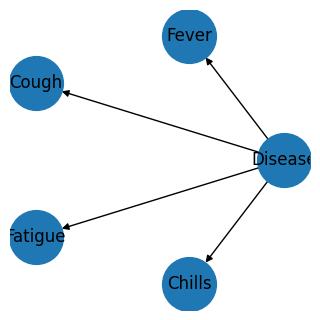

+---------------+----------------+
| Disease       |   phi(Disease) |
+===============+================+
| Disease(Flu)  |         0.5070 |
+---------------+----------------+
| Disease(Cold) |         0.4930 |
+---------------+----------------+
+---------------+----------------+
| Disease       |   phi(Disease) |
+===============+================+
| Disease(Flu)  |         0.6067 |
+---------------+----------------+
| Disease(Cold) |         0.3933 |
+---------------+----------------+
+--------------+----------------+
| Fatigue      |   phi(Fatigue) |
+==============+================+
| Fatigue(Yes) |         0.7000 |
+--------------+----------------+
| Fatigue(No)  |         0.3000 |
+--------------+----------------+


In [6]:
#@title Task 3
disease_states = ['Flu', 'Cold']
symptom_states = ['Yes', 'No']

model = DiscreteBayesianNetwork([
  ('Disease', 'Fever'),
  ('Disease', 'Cough'),
  ('Disease', 'Fatigue',),
  ('Disease', 'Chills')
])

disease_cpd = TabularCPD(
  variable='Disease',
  variable_card=2,
  values=[
    [0.3],
    [0.7]
  ],
  state_names={
    'Disease': disease_states
  }
)

# P(Fever | Disease)
fever_cpd = TabularCPD(
  variable='Fever',
  variable_card=2,
  values=[
    [0.9, 0.5],
    [0.1, 0.5]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Fever': symptom_states,
    'Disease': disease_states
  }
)

# P(Cough | Disease)
cough_cpd = TabularCPD(
  variable='Cough',
  variable_card=2,
  values=[
    [0.8, 0.6],
    [0.2, 0.4]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Cough': symptom_states,
    'Disease': disease_states
  }
)

# P(Chills | Disease)
chills_cpd = TabularCPD(
  variable='Chills',
  variable_card=2,
  values=[
    [0.6, 0.4],
    [0.4, 0.6]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Chills': symptom_states,
    'Disease': disease_states
  }
)

# P(Fatigue | Disease)
fatigue_cpd = TabularCPD(
  variable='Fatigue',
  variable_card=2,
  values=[
    [0.7, 0.3],
    [0.3, 0.7]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Fatigue': symptom_states,
    'Disease': disease_states
  }
)

model.add_cpds(fever_cpd, disease_cpd, chills_cpd, cough_cpd, fatigue_cpd)

assert model.check_model(), "Model incorrect"

plt.figure(figsize=(3, 3))
nx.draw(model,
  with_labels=True,
  node_size=1500,
  pos=nx.circular_layout(model)
)
plt.show()

inference = VariableElimination(model)

result1 = inference.query(variables=['Disease'], evidence={'Fever': 'Yes', 'Cough': 'Yes'})
result2 = inference.query(variables=['Disease'], evidence={'Fever': 'Yes', 'Cough': 'Yes', 'Chills': 'Yes'})
result3 = inference.query(variables=['Fatigue'], evidence={'Disease': 'Flu'})

print(result1)
print(result2)
print(result3) # P(Fatigue = Yes | Disease = Flu) = 0.7

In [8]:
#@title Task 4

states = ["Sunny", "Cloudy", "Rainy"]

T = np.array([
  [0.50, 0.40, 0.10],
  [0.30, 0.35, 0.35],
  [0.20, 0.50, 0.30]
])

def simulate(init: str, n: int = 10):
  current = init
  sequence = []

  for _ in range(n):
    match current:
      case "Sunny":
        _next = np.random.choice(states, p=T[0])
      case "Cloudy":
        _next = np.random.choice(states, p=T[1])
      case "Rainy":
        _next = np.random.choice(states, p=T[2])
    current = _next
    sequence.append(current)

  return sequence

simulate("Sunny", 10)

[np.str_('Sunny'),
 np.str_('Sunny'),
 np.str_('Sunny'),
 np.str_('Cloudy'),
 np.str_('Cloudy'),
 np.str_('Cloudy'),
 np.str_('Cloudy'),
 np.str_('Sunny'),
 np.str_('Cloudy'),
 np.str_('Sunny')]